In [5]:
#install.packages("openxslx")
#install.packages("tsibble")
#install.packages("fable")
#install.packages('gtrendsR')

## Twitter data and regression analysis  


In [6]:
library ('openxlsx')
TwitterData <- read.xlsx("https://raw.githubusercontent.com/dpstuart/jupyter/master/RusselGroupTwitter.xlsx", startRow=2)

In [7]:
cor(TwitterData[["Tweets"]], TwitterData[["Followers"]])

[1] -0.0749983

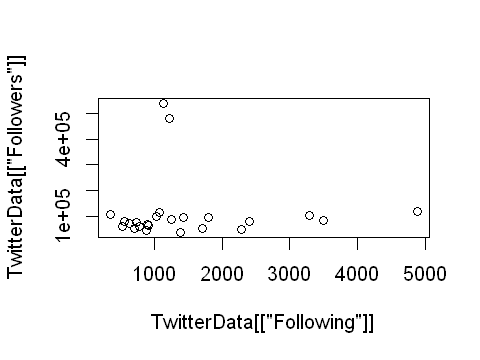

In [8]:
#Scatter plot of Twitter Data - options sets the size of the plot
options(repr.plot.width=4, repr.plot.height=3)
plot(TwitterData[['Following']], TwitterData[['Followers']])


In [9]:
withoutOxCam <- TwitterData[-c(3,17),] 
model<-lm(withoutOxCam[["Followers"]]~withoutOxCam[["Following"]]) 
summary(model)


Call:
lm(formula = withoutOxCam[["Followers"]] ~ withoutOxCam[["Following"]])

Residuals:
   Min     1Q Median     3Q    Max 
-39393 -11602  -2697  15489  41602 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 65251.415   8177.439   7.979 1.21e-07 ***
withoutOxCam[["Following"]]     7.405      4.369   1.695    0.106    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22890 on 20 degrees of freedom
Multiple R-squared:  0.1256,	Adjusted R-squared:  0.08186 
F-statistic: 2.872 on 1 and 20 DF,  p-value: 0.1056


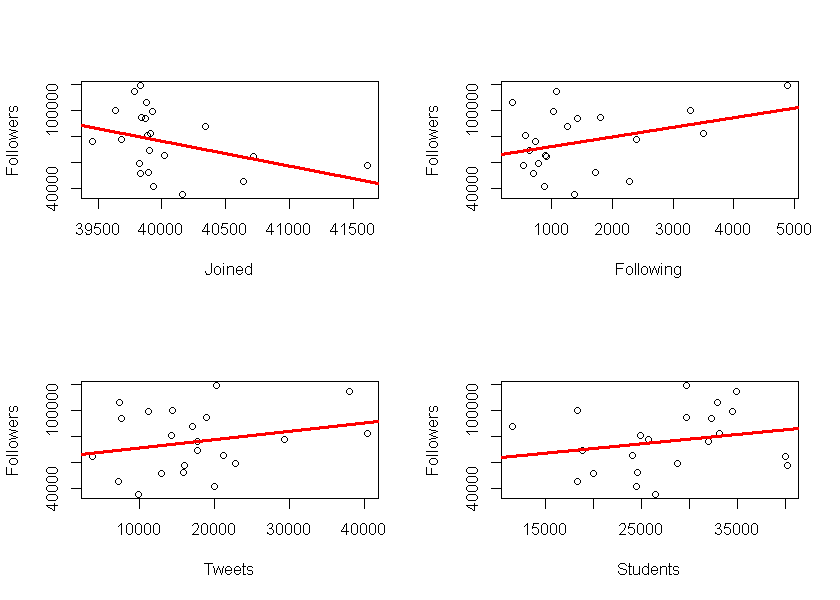

In [10]:
options(repr.plot.width=7, repr.plot.height=5)
par(mfrow=c(2,2)) 

#joined
plot(withoutOxCam[['Joined']], withoutOxCam[['Followers']],   xlab="Joined", ylab="Followers")
model<-lm(withoutOxCam[["Followers"]]~withoutOxCam[["Joined"]]) 
abline(model, col=2, lwd=3)

#following
plot(withoutOxCam[['Following']], withoutOxCam[['Followers']],   xlab="Following", ylab="Followers")
model<-lm(withoutOxCam[["Followers"]]~withoutOxCam[["Following"]]) 
abline(model, col=2, lwd=3)

#tweets
plot(withoutOxCam[['Tweets']], withoutOxCam[['Followers']],   xlab="Tweets", ylab="Followers")
model<-lm(withoutOxCam[["Followers"]]~withoutOxCam[["Tweets"]]) 
abline(model, col=2, lwd=3)

#students
plot(withoutOxCam[['Students']], withoutOxCam[['Followers']],   xlab="Students", ylab="Followers")
model<-lm(withoutOxCam[["Followers"]]~withoutOxCam[["Students"]]) 
abline(model, col=2, lwd=3)


## Multiple regression analysis

In [11]:
#convert Joined data - 43722 is the Excel 'date' of the day the data was collected. 
withoutOxCam[["daysJoined"]] <- 43722-withoutOxCam[["Joined"]]


In [12]:
model<-lm(withoutOxCam[["Followers"]]~withoutOxCam[["daysJoined"]]
          +withoutOxCam[["Following"]]+withoutOxCam[["Tweets"]]
          +withoutOxCam[["Students"]]) 
summary(model)



Call:
lm(formula = withoutOxCam[["Followers"]] ~ withoutOxCam[["daysJoined"]] + 
    withoutOxCam[["Following"]] + withoutOxCam[["Tweets"]] + 
    withoutOxCam[["Students"]])

Residuals:
   Min     1Q Median     3Q    Max 
-35516 -14264   1501  13019  37719 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)  
(Intercept)                  -4.124e+04  4.820e+04  -0.856   0.4041  
withoutOxCam[["daysJoined"]]  2.049e+01  1.133e+01   1.808   0.0884 .
withoutOxCam[["Following"]]   6.610e+00  4.399e+00   1.503   0.1513  
withoutOxCam[["Tweets"]]      2.553e-03  5.679e-01   0.004   0.9965  
withoutOxCam[["Students"]]    1.161e+00  6.791e-01   1.709   0.1056  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 21640 on 17 degrees of freedom
Multiple R-squared:  0.3359,	Adjusted R-squared:  0.1797 
F-statistic:  2.15 on 4 and 17 DF,  p-value: 0.1188


## Exponential Smoothing

### Simple exponential smoothing

In [13]:
library ('openxlsx')
library ('tsibble')
library ('fable')
BLdata <- read.xlsx("https://raw.githubusercontent.com/dpstuart/jupyter/master/BritishLibraryVisitors.xlsx")
BLts<-as_tsibble(BLdata, index=Year)

Warning message:
"package 'tsibble' was built under R version 3.6.1"Warning message:
"package 'fable' was built under R version 3.6.1"Loading required package: fabletools
Warning message:
"package 'fabletools' was built under R version 3.6.1"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [15]:
fit <- model(BLts, ETS(Visitors))
report(fit)

Series: Visitors 
Model: ETS(A,N,N) 
  Smoothing parameters:
    alpha = 0.9767139 

  Initial states:
       l
 1114885

  sigma^2:  9382911512

     AIC     AICc      BIC 
362.2589 364.6589 364.1760 


In [16]:
fit <- model(BLts, ETS(Visitors ~ error("A") + trend("N", alpha=0.977)
        + season("N")))
forecast(fit)

.model,Year,Visitors,.distribution
"ETS(Visitors ~ error(""A"") + trend(""N"", alpha = 0.977) + season(""N""))",2019,1437617,"N(1437617, 9.4e+09)"
"ETS(Visitors ~ error(""A"") + trend(""N"", alpha = 0.977) + season(""N""))",2020,1437617,"N(1437617, 1.8e+10)"


### Triple Exponential Smoothing with Google Trends

In [17]:
library (gtrendsR)
library (tsibble)
library (fable)
searches <- gtrends("summer reading challenge", geo = "GB", time="all")

Warning message:
"package 'gtrendsR' was built under R version 3.6.1"

In [18]:
searchesDF<-data.frame(searches$interest_over_time)
searchesDF$date<- yearmonth(searchesDF$date)

In [22]:
searchesTS<-as_tsibble(searchesDF, index = date)
fit <- model(searchesTS, ETS(hits))
future<-forecast(fit)

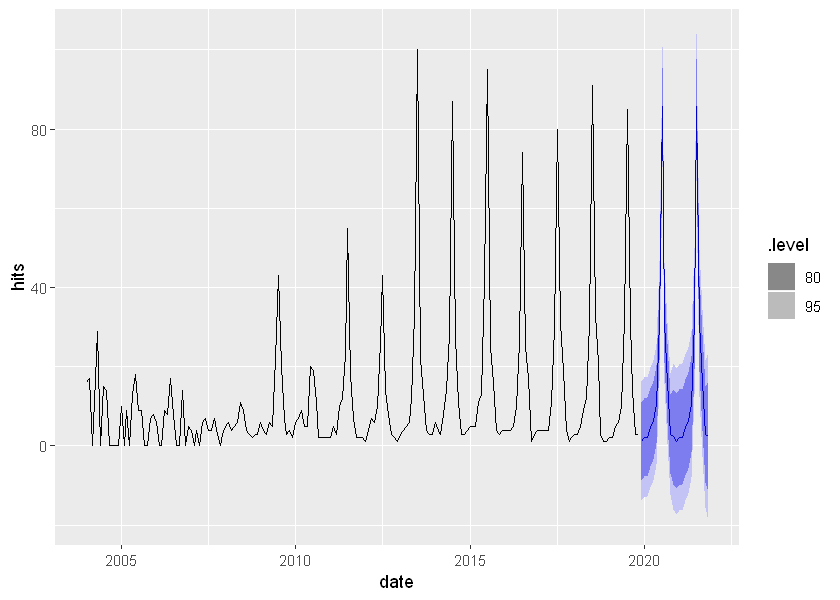

In [23]:
autoplot(future, searchesTS)
